In [10]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

In [11]:
%matplotlib inline

In [12]:
gtif = gdal.Open( "HillslopeClassification.tif" )
print gtif.GetMetadata()
print gtif.GetDescription()

{'DataType': 'Generic', 'AREA_OR_POINT': 'Area'}
HillslopeClassification.tif


In [13]:
ds = gdal.Open("Dem_Slope.tif")
slope = np.array(ds.GetRasterBand(1).ReadAsArray())

In [14]:
slope[slope<-1] = np.nan

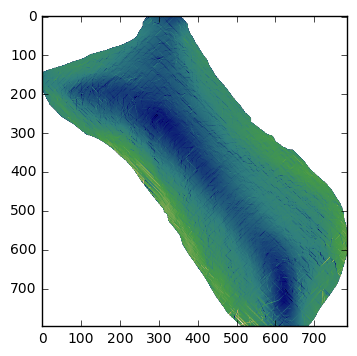

In [33]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(slope, cmap='gist_earth')
# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])


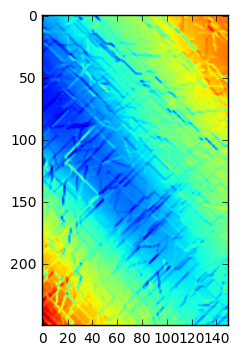

In [60]:
plt.imshow(slope[250:500, 350:500])

In [92]:
ds = gdal.Open("HillslopeOnlyVeg.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [93]:
np.unique(veg)

array([0, 1], dtype=uint8)

In [94]:
testveg = veg[2000:2500, 2000:2500]
Nx = testveg.shape[0]
Ny = testveg.shape[1]

In [103]:
f = open("../example_veg/ti.gslib", "w")
f.write('500, 500, 1, 1, 1, 0, 0, 0\n')
f.write('Veg\n')
f.write('1\n')
for i in range(Nx):
    for j in range(Ny):
        f.write(' {}\n'.format(str(testveg[i,j])))

In [106]:
np.unique(testveg)

array([0, 1], dtype=uint8)

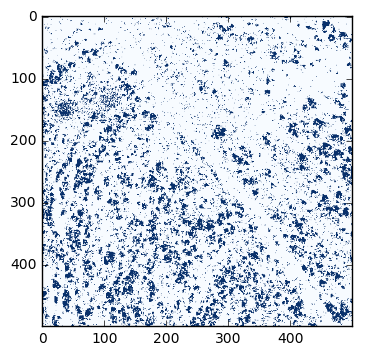

In [107]:
plt.imshow(veg[2000:2500, 2000:2500], cmap = 'Blues')

In [66]:
# veg = veg.astype(float)
# veg[veg == 0] = np.nan

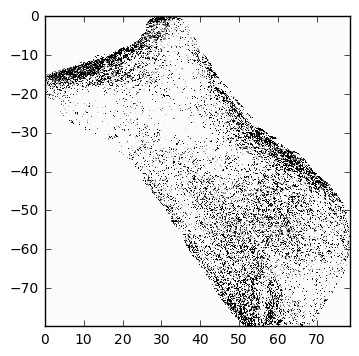

In [67]:
nrows, ncols = slope.shape
# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(1-veg, cmap='gist_earth', extent=[x0, x1, y1, y0])


In [68]:
ds = gdal.Open("HillslopeClassification.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [69]:
veg = veg.astype(float)
veg[veg == 255] = np.nan

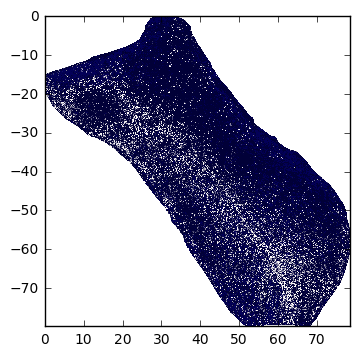

In [70]:
nrows, ncols = slope.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()  
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.figure()
#plt.imshow(clssfy, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.imshow(veg, cmap='gist_earth', extent=[x0, x1, y1, y0])
